In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import classification_report, log_loss
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

import pickle

In [3]:
#load the dataset
data = pd.read_csv('processed_df.csv')

#check
data.head()

,state,staff_pick,goal_usd,name_count,blurb_count,prep_time,cam_duration,country_AU,country_CA,country_DE,...,parent_category_Fashion,parent_category_Film & Video,parent_category_Food,parent_category_Games,parent_category_Journalism,parent_category_Music,parent_category_Photography,parent_category_Publishing,parent_category_Technology,parent_category_Theater
0,1,1,100.0,3,16,3,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,5000.0,2,13,130,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,5000.0,6,14,0,30,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,5000.0,2,26,213,30,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,500.0,8,24,0,7,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
data.columns

Index(['state', 'staff_pick', 'goal_usd', 'name_count', 'blurb_count',
       'prep_time', 'cam_duration', 'country_AU', 'country_CA', 'country_DE',
       'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IT',
       'country_MX', 'country_NL', 'country_Other', 'country_SE', 'country_US',
       'parent_category_Art', 'parent_category_Comics',
       'parent_category_Crafts', 'parent_category_Dance',
       'parent_category_Design', 'parent_category_Fashion',
       'parent_category_Film & Video', 'parent_category_Food',
       'parent_category_Games', 'parent_category_Journalism',
       'parent_category_Music', 'parent_category_Photography',
       'parent_category_Publishing', 'parent_category_Technology',
       'parent_category_Theater'],
      dtype='object')

In [5]:
#rename parent category columns
data.rename(columns={'parent_category_Art': 'Art',
                   'parent_category_Comics': 'Comics',
                   'parent_category_Crafts': 'Crafts', 
                   'parent_category_Dance': 'Dance', 
                   'parent_category_Design': 'Design',
                   'parent_category_Fashion': 'Fashion', 
                   'parent_category_Film & Video': 'Film_Video',
                   'parent_category_Food': 'Food', 
                   'parent_category_Games': 'Games', 
                   'parent_category_Journalism': 'Journalism',
                   'parent_category_Music': 'Music', 
                   'parent_category_Photography': 'Photography',
                   'parent_category_Publishing': 'Publishing', 
                   'parent_category_Technology': 'Technology',
                   'parent_category_Theater': 'Theater'}, inplace=True)
#check
data.columns

Index(['state', 'staff_pick', 'goal_usd', 'name_count', 'blurb_count',
       'prep_time', 'cam_duration', 'country_AU', 'country_CA', 'country_DE',
       'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IT',
       'country_MX', 'country_NL', 'country_Other', 'country_SE', 'country_US',
       'Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film_Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'],
      dtype='object')

In [6]:
# Separating the independent variables from dependent variables
X = data.drop('state', axis =1)
y = data['state']

In [7]:
#Split train-test data (0.8:0.2)
 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [7]:
#define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_predict):
    '''This function takes the ground truth target values and the estimated targets returned by a classifier
    and plots the confusion matrix with each class indicated on the plot'''

    cf = confusion_matrix(y_true, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(cf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['fail','successful'],
           yticklabels=['fail','successful']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [8]:
#instantiate the baseline model using startified strategy since the dataset is imbalanced
dummy_clf = DummyClassifier(strategy='stratified')

#define pipeline for scaling the data and the baseline model
baseline_pipeline = Pipeline([('scaling', StandardScaler()),
    ('baseline_model', dummy_clf)])

#fit the data
baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('baseline_model', DummyClassifier(strategy='stratified'))])

Baseline model score for training data: 0.51919
Baseline model score for test data: 0.52059
Log loss on Test Data using Random Baseline Model 16.7453824130289
AUC score for baseline model: 0.4976796864223889
              precision    recall  f1-score   support

           0       0.40      0.40      0.40     15265
           1       0.60      0.60      0.60     22602

    accuracy                           0.52     37867
   macro avg       0.50      0.50      0.50     37867
weighted avg       0.52      0.52      0.52     37867



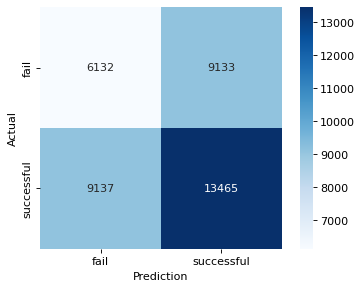

In [9]:
#make predictions
y_pred_baseline = baseline_pipeline.predict(X_test)

y_proba_baseline = baseline_pipeline.predict_proba(X_test)

#compute baseline model score
print("Baseline model score for training data:", round(baseline_pipeline.score(X_train, y_train),5))
print("Baseline model score for test data:", round(baseline_pipeline.score(X_test, y_test),5))

#compute log-loss
print(f"Log loss on Test Data using Random Baseline Model {log_loss(y_test, y_proba_baseline)}")

#compute roc-auc score
print(f"AUC score for baseline model: {roc_auc_score(y_test, y_proba_baseline[:,1])}")

print(classification_report(y_test, y_pred_baseline))

#plot confusion matrix
plot_confusion_matrix(y_test, y_pred_baseline)

## Use LogisticRegression

In [10]:
#initialize logistic regression
lr = LogisticRegression()

#define pipeline
lr_pipeline = Pipeline([('scaling', StandardScaler()),
    ('logistic', lr)])

#fit the training data
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('logistic', LogisticRegression())])

Logistic Regression score for training set: 0.72189
Logistic Regression score for test set: 0.71844
AUC score for logistic regression model: 0.7797
Log loss on Test Data using Logistic Regression Model 0.54857
              precision    recall  f1-score   support

           0       0.70      0.53      0.60     15265
           1       0.73      0.84      0.78     22602

    accuracy                           0.72     37867
   macro avg       0.71      0.69      0.69     37867
weighted avg       0.72      0.72      0.71     37867



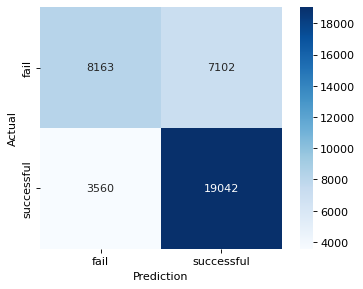

In [11]:
#make predictions
y_lr = lr_pipeline.predict(X_test)

y_lr_proba = lr_pipeline.predict_proba(X_test)

#evaluate the model

print("Logistic Regression score for training set:", round(lr_pipeline.score(X_train, y_train),5))
print("Logistic Regression score for test set:", round(lr_pipeline.score(X_test, y_test),5))

#compute roc-auc score
print(f"AUC score for logistic regression model: {round(roc_auc_score(y_test, y_lr_proba[:,1]),5)}")

#compute log-loss
print(f"Log loss on Test Data using Logistic Regression Model {round(log_loss(y_test, y_lr_proba),5)}")

print(classification_report(y_test, y_lr))

#plot confusion matrix
plot_confusion_matrix(y_test, y_lr)

In [12]:
#perform grid search with logistic regression
params = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}] #, "max_iter": [100, 120, 150]}]

# Create a classifier object with the classifier and parameter candidates
grid_lr = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=params, cv= 5, verbose=1, n_jobs=-1)

#define the pipeline
grid_lr_pipeline = Pipeline([('scaling', StandardScaler()),
    ('logistic_grid', grid_lr)])

# fit the classifier
grid_lr_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


Pipeline(steps=[('scaling', StandardScaler()),
                ('logistic_grid',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(solver='liblinear'),
                              n_jobs=-1,
                              param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                 1000],
                                           'penalty': ['l1', 'l2']}],
                              verbose=1))])

Logistic Regression with grid search score for training set: 0.72266
Logistic Regression with grid search score for test set: 0.71947
AUC score for logistic regression with grid search model: 0.78025
Log loss on Test Data using Logistic Regression Model with grid search 0.54862
              precision    recall  f1-score   support

           0       0.70      0.54      0.61     15265
           1       0.73      0.84      0.78     22602

    accuracy                           0.72     37867
   macro avg       0.71      0.69      0.69     37867
weighted avg       0.72      0.72      0.71     37867



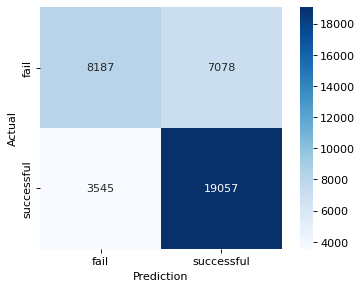

In [13]:
#predict
y_lr_grid = grid_lr_pipeline.predict(X_test)

y_lr_grid_proba = grid_lr_pipeline.predict_proba(X_test)

#evaluate the model
print("Logistic Regression with grid search score for training set:", round(grid_lr_pipeline.score(X_train, y_train),5))
print("Logistic Regression with grid search score for test set:", round(grid_lr_pipeline.score(X_test, y_test),5))

#compute roc-auc score
print(f"AUC score for logistic regression with grid search model: {round(roc_auc_score(y_test, y_lr_grid_proba[:,1]),5)}")

#compute log-loss
print(f"Log loss on Test Data using Logistic Regression Model with grid search {round(log_loss(y_test, y_lr_grid_proba),5)}")

print(classification_report(y_test, y_lr_grid))

#plot confusion matrix
plot_confusion_matrix(y_test, y_lr_grid)

In [14]:
#get the parameter setting with best results
grid_lr.best_params_

{'C': 100, 'penalty': 'l2'}

## Use Random Forest Classifier

In [15]:
#initialize Random Forest classifier
rfc = RandomForestClassifier(random_state = 42)

#define the pipeline
rfc_pipeline = Pipeline([('scaling', StandardScaler()),
    ('rfc', rfc)])

#fit the training data
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('rfc', RandomForestClassifier(random_state=42))])

Random Forest Classifier score for training set: 0.99868
Random Forest Classifier score for test set: 0.7459
AUC score for random forest model: 0.80932
Log loss on Test Data using RandomForest Classifier 0.53082
              precision    recall  f1-score   support

           0       0.71      0.62      0.66     15265
           1       0.77      0.83      0.80     22602

    accuracy                           0.75     37867
   macro avg       0.74      0.73      0.73     37867
weighted avg       0.74      0.75      0.74     37867



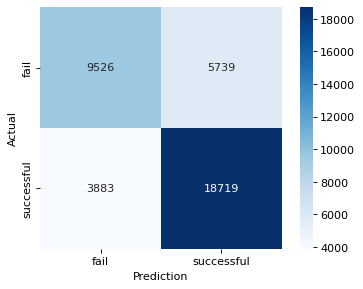

In [16]:
#make predictions
y_rfc = rfc_pipeline.predict(X_test)

y_rfc_proba = rfc_pipeline.predict_proba(X_test)

#evaluate the model
print("Random Forest Classifier score for training set:", round(rfc_pipeline.score(X_train, y_train),5))
print("Random Forest Classifier score for test set:", round(rfc_pipeline.score(X_test, y_test),5))

#compute roc-auc score
print(f"AUC score for random forest model: {round(roc_auc_score(y_test, y_rfc_proba[:,1]),5)}")

#compute log-loss
print(f"Log loss on Test Data using RandomForest Classifier {round(log_loss(y_test, y_rfc_proba),5)}")

print(classification_report(y_test, y_rfc))

#plot confusion matrix
plot_confusion_matrix(y_test, y_rfc)

The difference between the score for the training and test datasets show that the model is overfitting. The hyperparameter will be tuned using grid search

In [17]:
#grid search with randomforest
params_grid = [
  {'n_estimators': [150, 200, 250], 'max_features': [10, 13, 15, 17],
   'max_depth': [5, 7, 10]}
]

# Create a classifier object with the classifier and parameter candidates
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 42), param_grid=params_grid, cv=5, verbose=1, n_jobs=-1)

#define the pipeline
rfc_grid_pipeline = Pipeline([('scaling', StandardScaler()),
    ('rfc_grid', rfc_grid)])

# Train the classifier
rfc_grid_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Pipeline(steps=[('scaling', StandardScaler()),
                ('rfc_grid',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid=[{'max_depth': [5, 7, 10],
                                           'max_features': [10, 13, 15, 17],
                                           'n_estimators': [150, 200, 250]}],
                              verbose=1))])

Random Forest with grid search score for training set: 0.75306
Random Forest with grid search score for test set: 0.74249
AUC score for random forest with grid search model: 0.81094
Log loss on Test Data using Random Forest Model with grid search 0.5165192071889959
              precision    recall  f1-score   support

           0       0.74      0.55      0.63     15265
           1       0.74      0.87      0.80     22602

    accuracy                           0.74     37867
   macro avg       0.74      0.71      0.72     37867
weighted avg       0.74      0.74      0.73     37867



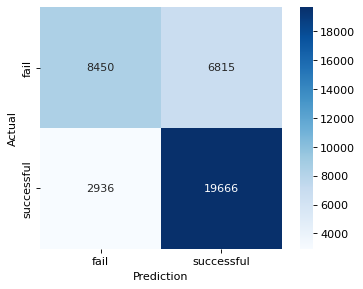

In [20]:
#predict
y_rfc_grid = rfc_grid_pipeline.predict(X_test)

y_rfc_grid_proba = rfc_grid_pipeline.predict_proba(X_test)

#evaluate the model
print("Random Forest with grid search score for training set:", round(rfc_grid_pipeline.score(X_train, y_train),5))
print("Random Forest with grid search score for test set:", round(rfc_grid_pipeline.score(X_test, y_test),5))

#compute roc-auc score
print(f"AUC score for random forest with grid search model: {round(roc_auc_score(y_test, y_rfc_grid_proba[:,1]),5)}")

#compute log-loss
print(f"Log loss on Test Data using Random Forest Model with grid search {log_loss(y_test, y_rfc_grid_proba)}")

print(classification_report(y_test, y_rfc_grid))

#plot confusion matrix
plot_confusion_matrix(y_test, y_rfc_grid)

In [19]:
#get the parameter setting with best results
rfc_grid.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 250}

## Use Support Vector Machines

In [ ]:
#Create a svm Classifier
svc = SVC(probability=True)

#define the pipeline
svc_pipeline = Pipeline([('scaling', StandardScaler()),
    ('svc', svc)])

#Train the model using the training sets
svc_pipeline.fit(X_train, y_train)

In [ ]:
#predict
y_svc = svc_pipeline.predict(X_test)

y_svc_proba = svc_pipeline.predict_proba(X_test)

#evaluate the model
print("Support Vector Classifier score for training set:", round(svc_pipeline.score(X_train, y_train),5))
print("Support Vector Classifier score for test set:", round(svc_pipeline.score(X_test, y_test),5))

#compute roc-auc score
print(f"AUC score for Support Vector Classifier: {round(roc_auc_score(y_test, y_svc_proba[:,1]),5)}")

#compute log-loss
print(f"Log loss on Test Data using Support Vector Classifier {log_loss(y_test, y_svc_proba)}")

print(classification_report(y_test, y_svc))

#plot confusion matrix
plot_confusion_matrix(y_test, y_svc)

## Use XGBoost

In [21]:
#initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="logloss")

#define pipeline
xgb_pipeline = Pipeline([('scaling', StandardScaler()),
    ('xgb', xgb_model)
                    ])
#fit the model
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

XGBoost score for training set: 0.77783
XGBoost  score for test set: 0.75625
AUC score for XGBoost model: 0.8263
Log loss on Test Data using XGBoost model 0.4930718513622208
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     15265
           1       0.77      0.85      0.81     22602

    accuracy                           0.76     37867
   macro avg       0.75      0.73      0.74     37867
weighted avg       0.75      0.76      0.75     37867



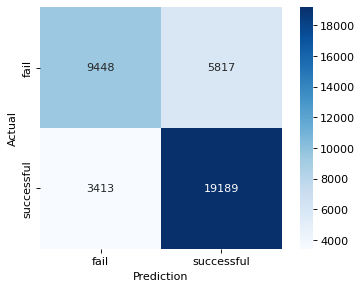

In [22]:
#make prediction
y_xgb = xgb_pipeline.predict(X_test)

y_xgb_proba = xgb_pipeline.predict_proba(X_test)

#evaluate the model
print("XGBoost score for training set:", round(xgb_pipeline.score(X_train, y_train),5))
print("XGBoost  score for test set:", round(xgb_pipeline.score(X_test, y_test),5))

#compute roc-auc score
print(f"AUC score for XGBoost model: {round(roc_auc_score(y_test, y_xgb_proba[:,1]),5)}")

#compute log-loss
print(f"Log loss on Test Data using XGBoost model {log_loss(y_test, y_xgb_proba)}")

print(classification_report(y_test, y_xgb))

#plot confusion matrix
plot_confusion_matrix(y_test, y_xgb)

In [24]:
#compute roc_curve  & area under ROC curve for random baseline model
fpr_baseline, tpr_baseline, thresholds_baseline = roc_curve(y_test, y_proba_baseline[:,1])
roc_auc_baseline = roc_auc_score(y_test, y_proba_baseline[:,1])

#compute roc_curve & area under ROC curve for logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lr_proba[:,1])
roc_auc_lr = roc_auc_score(y_test, y_lr_proba[:,1])

#compute roc_curve & area under ROC curve for logistic regression model with grid search
fpr_lr_grid, tpr_lr_grid, thresholds_lr_grid = roc_curve(y_test, y_lr_grid_proba[:,1])
roc_auc_lr_grid = roc_auc_score(y_test, y_lr_grid_proba[:,1])

#compute roc_curve & area under ROC curve for Random Forest model
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_rfc_proba[:,1])
roc_auc_rfc = roc_auc_score(y_test, y_rfc_proba[:,1])

#compute roc_curve & area under ROC curve for Random Forest model with grid search
fpr_rfc_grid, tpr_rfc_grid, thresholds_rfc_grid = roc_curve(y_test, y_rfc_grid_proba[:,1])
roc_auc_rfc_grid = roc_auc_score(y_test, y_rfc_grid_proba[:,1])

#compute roc_curve & area under ROC curve for XGBoost model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_xgb_proba[:,1])
roc_auc_xgb = roc_auc_score(y_test, y_xgb_proba[:,1])

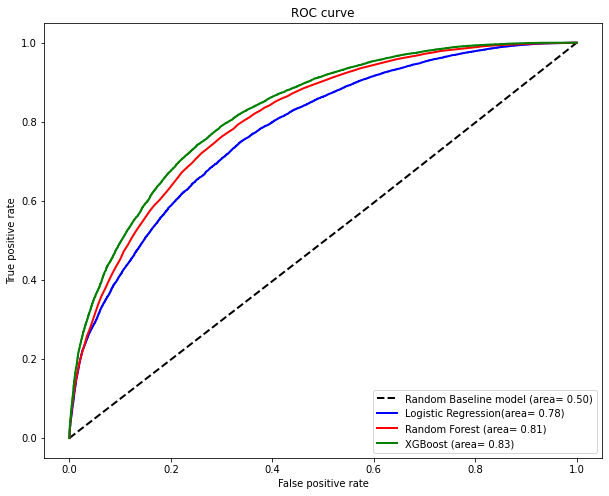

In [28]:
#make roc_auc curve for all models
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_baseline, tpr_baseline, color='black', lw=lw, ls='--', 
         label='Random Baseline model (area= %0.2f)' %roc_auc_baseline)

plt.plot(fpr_lr, tpr_lr, color='blue', lw=lw, 
         label='Logistic Regression(area= %0.2f)' %roc_auc_lr)

# plt.plot(fpr_lr_grid, tpr_lr_grid, color='purple', lw=lw, 
#          label='Logistic Regression with grid search (area= %0.2f)' %roc_auc_lr_grid)

plt.plot(fpr_rfc, tpr_rfc, color='red', lw=lw, 
         label='Random Forest (area= %0.2f)' %roc_auc_rfc)

# plt.plot(fpr_rfc_grid, tpr_rfc_grid, color='pink', lw=lw, 
#          label='Random Forest with grid search (area= %0.2f)' %roc_auc_rfc_grid)

plt.plot(fpr_xgb, tpr_xgb, color='green', lw=lw, 
         label='XGBoost (area= %0.2f)' %roc_auc_xgb)


plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
#for model interpretation
#scale the training dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

#Split train-test data (0.8:0.2)
 
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.20)

In [19]:
#initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="logloss", early_stopping_rounds=5)

#fit the training data

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62536
[1]	validation_0-logloss:0.58875
[2]	validation_0-logloss:0.56535
[3]	validation_0-logloss:0.54893
[4]	validation_0-logloss:0.53873
[5]	validation_0-logloss:0.53022
[6]	validation_0-logloss:0.52403
[7]	validation_0-logloss:0.51931
[8]	validation_0-logloss:0.51560
[9]	validation_0-logloss:0.51211
[10]	validation_0-logloss:0.50913
[11]	validation_0-logloss:0.50657
[12]	validation_0-logloss:0.50464
[13]	validation_0-logloss:0.50335
[14]	validation_0-logloss:0.50232
[15]	validation_0-logloss:0.50120
[16]	validation_0-logloss:0.49979
[17]	validation_0-logloss:0.49853
[18]	validation_0-logloss:0.49752
[19]	validation_0-logloss:0.49650
[20]	validation_0-logloss:0.49604
[21]	validation_0-logloss:0.49564
[22]	validation_0-logloss:0.49481
[23]	validation_0-logloss:0.49455
[24]	validation_0-logloss:0.49430
[25]	validation_0-logloss:0.49374
[26]	validation_0-logloss:0.49318
[27]	validation_0-logloss:0.49306
[28]	validation_0-logloss:0.49279
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=5, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

XGBoost Classifier score for training set: 0.77097
XGBoost Classifier score for test set: 0.76032
Log loss on Test Data using XGBoost Model 0.49005439505247295
              precision    recall  f1-score   support

           0       0.74      0.62      0.67     15172
           1       0.77      0.85      0.81     22695

    accuracy                           0.76     37867
   macro avg       0.76      0.74      0.74     37867
weighted avg       0.76      0.76      0.76     37867



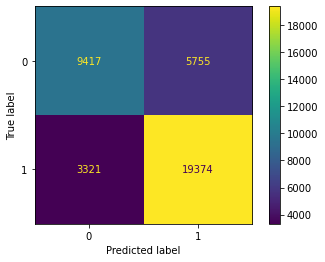

In [20]:
#make predictions
y_xgb = xgb_model.predict(X_test)

y_xgb_proba = xgb_model.predict_proba(X_test)

print("XGBoost Classifier score for training set:", round(xgb_model.score(X_train, y_train),5))
print("XGBoost Classifier score for test set:", round(xgb_model.score(X_test, y_test),5))

#compute log-loss
print(f"Log loss on Test Data using XGBoost Model {log_loss(y_test, y_xgb_proba)}")

print(classification_report(y_test, y_xgb))

#plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_xgb)

## Threshold moving

In [56]:
from numpy import sqrt
from numpy import argmax, arange
from sklearn.metrics import f1_score

xgb_probs = y_xgb_proba[:, 1]

#calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')



Best Threshold=0.599178, G-Mean=0.746


In [55]:
f1_score(y_test, to_labels(xgb_probs, 0.599))

0.7867238654323775

In [53]:
def make_confusion_matrix(model, threshold=0.599178):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:,1] >=threshold)
    cm = confusion_matrix(y_test, y_predict)
    
    plt.figure(figsize=(25,7))
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=True, annot_kws={"size":20}, fmt='g')
    cmlabels = ['True Negatives', "False Positives",
               'False Negatives', "True Positives"]
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix - XGBoost', size=25)
    plt.xlabel('Predicted Campaign Outcome', size=20)
    plt.ylabel('Actual Campaign Outcome', size=20)
    labels = ['Fail', 'Success']
    ax.set_xticklabels(labels, size=15)
    ax.set_yticklabels(labels, size=15)
    plt.tight_layout()

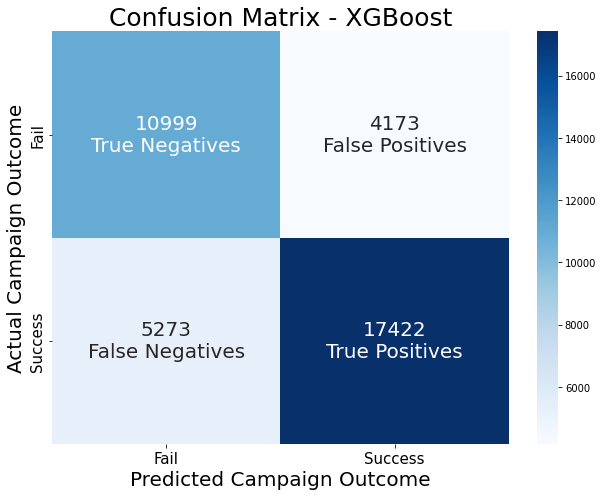

In [54]:
make_confusion_matrix(xgb_model, 0.599)

In [ ]:
#define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_predict):
    '''This function takes the ground truth target values and the estimated targets returned by a classifier
    and plots the confusion matrix with each class indicated on the plot'''

    cf = confusion_matrix(y_true, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(cf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['fail','successful'],
           yticklabels=['fail','successful']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

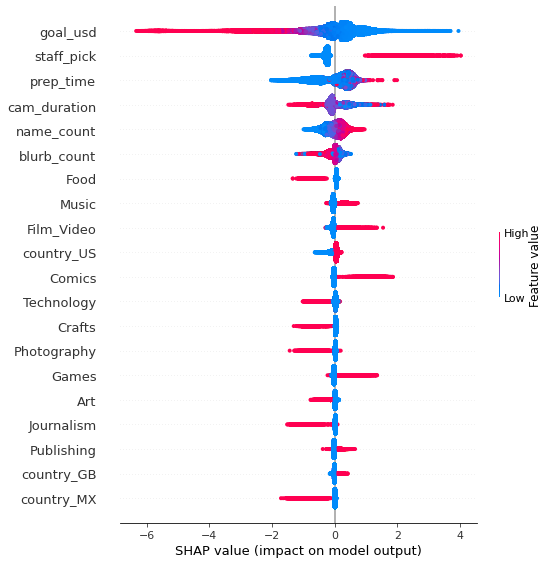

In [24]:
import shap

#convert to dataframe for SHAP interpretation
X_shap = pd.DataFrame(scaled_data, columns = X.columns)

# explain the model's predictions using SHAP

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_shap)

# visualize the first prediction's explanation
shap.summary_plot(shap_values, X_shap)

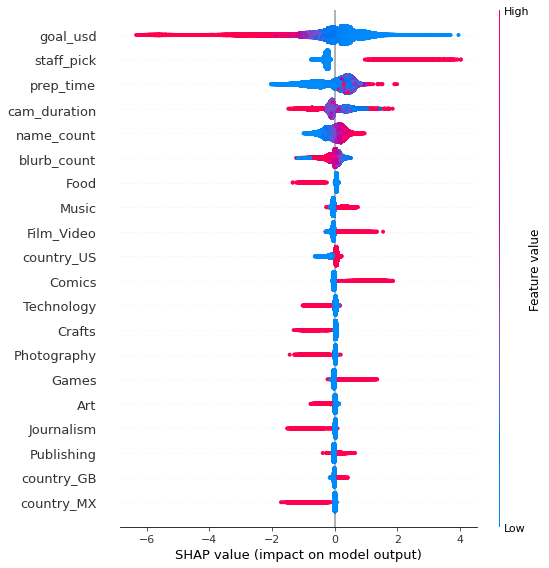

In [25]:
shap.summary_plot(shap_values, X_shap, show=False)
plt.gcf().axes[-1].set_aspect(1000)
plt.gcf().axes[-1].set_box_aspect(1000)
plt.show()